# CHAPTER2 지도학습`

+ 지도학습: 지도 학습은 입력과 출력 샘플 데이터가 존재, 주어진 입력으로부터 출력을 예측하고자 할 때 사용.

## 2.1 분류와 회귀
+ 분류: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측. ex) 붓꽃 품종 분류  
    + 이진분류: 두 개의 클래스 분류 / 양성(positive)클래스 or 음성(negative)클래스  
    + 다중분류: 셋 이상의 클래스로 분류
+ 회귀: 연속적인 숫자 또는 부동소수정수(실수)를 예측, 예상 출력 값 사이에 연속성이 있다면 회귀 문제

## 2.2 일반화, 과대적합, 과소적합
+ 일반화(generalization): 모델이 처음 보는 데이터에 대해 정확하게 예측, 즉 훈련 세트에서 테스트 세트로
일반화
+ 과대적합(overfitting): 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는것, 모델이 훈련 세트의 각 샘
플에 너무 가깝게 맞춰져 새로운 데이터에 일반화되기 어려운 경우
+ 과소적합(underfitting): 모델이 너무 간단하여 데이터의 면면과 다양성을 잡아내지 못하고 훈련 세트에 잘
맞지 않는 경우

일반화 성능이 최대가 되는 최적검에 있는 모델을 찾는 것이 목적

## 2.3 지도 학습 알고리즘

### 2.3.1  예제에 사용할 데이터셋

In [3]:
pip install mglearn

In [22]:
# 실습하기 전 import문
import numpy as np
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [5]:
# 한글 Font
from matplotlib import rc
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
%matplotlib inline

In [7]:
from sklearn.datasets import make_blobs

+ forge() 데이터셋 (이진 분류 데이터셋)  
   26개의 데이터 포인트와 2개의 특성

X.shape (26, 2)


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


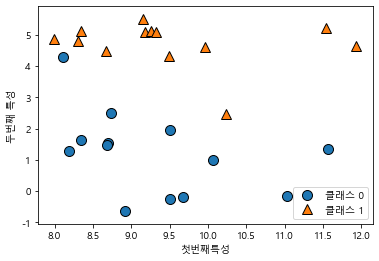

In [9]:
# In[3]:
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['클래스 0',"클래스 1"],loc=4)
plt.xlabel("첫번째특성")
plt.ylabel("두번째 특성")
print("X.shape",X.shape)

+ wave 데이터셋(회귀 알고리즘)

Text(0, 0.5, '타깃')

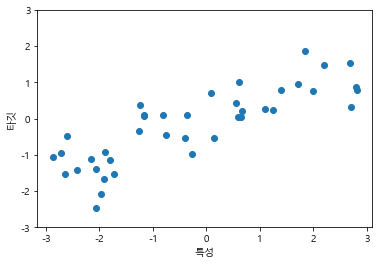

In [10]:
# In[4]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [11]:
# In[5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key(): \n", cancer.keys())

cancer.key(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
# In[6]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [13]:
# In[7]:
print("클래스별 샘플 개수:\n",
     {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [14]:
# In[8]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
# In[9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: ", boston.data.shape)

데이터의 형태:  (506, 13)


In [16]:
# In[10]:
X,y = mglearn.datasets.load_extended_boston()
print("X Shape:", X.shape)

X Shape: (506, 104)


### 2.3.2 k-최근접 이웃
+ k-최근접 이웃 분류
+ k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


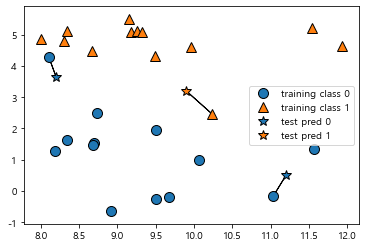

In [17]:
# In[11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


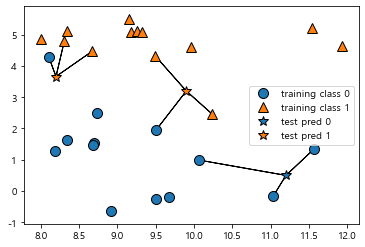

In [18]:
# In[12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
# In[13]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [20]:
# In[14] & [15] & [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도:0.86


+ KNeighborsClassifier 분석  
  + 이웃의 수를 늘릴수록 결정 경계(decision boundary)는 더 부드러워짐, 더 단순한 모델을 의미  
  + 이웃을 적게 사용, 모델의 복잡도 증가  
  + 이웃을 많이 사용, 모델의 복잡도 감소

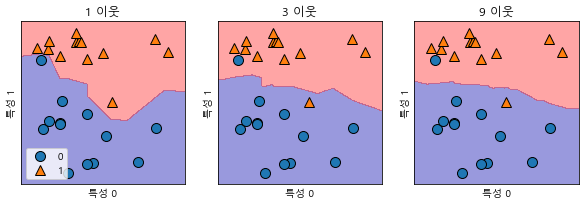

In [24]:
# In[18]:
from sklearn.neighbors import KNeighborsClassifier
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
 mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
 mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
 ax.set_title("{} 이웃".format(n_neighbors))
 ax.set_xlabel("특성 0")
 ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

+ n_neighbors 변화에 따른 훈련 정확도와 테스트 정확도
이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦

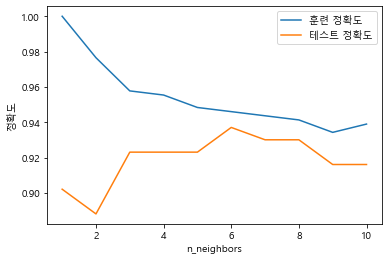

In [26]:
# In[19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

+ k-최근접 이웃 회귀
  + k-최근접 이웃 알고리즘은 회귀 분석에도 쓰임
  + 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측

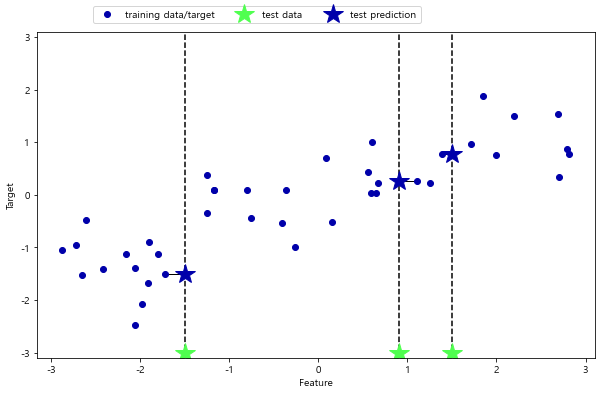

In [27]:
# In[20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

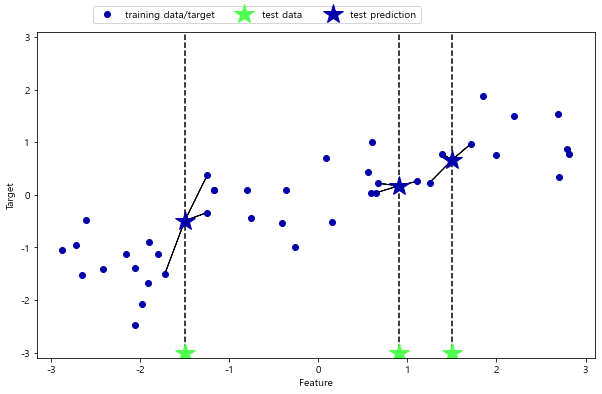

In [28]:
# In[21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [29]:
# In[22]:

from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("테스트 세트 예측:",reg.predict(X_test))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test,y_test)))

테스트 세트 예측: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


+ 장단점과 매개변수
  + KNeighbors 분류기에 중요한 매개변수
     + 1.데이터 포인트 사이의 거리를 재는 방법
     + 2.이웃의 수
  + 장단점
     + 장점: 이해하기 쉬움
     + 단점: 예측이 느리고 많은 특성을 처리하는 능력이 부족

### 2.3.3 선형 모델
+ 입력 특성에 대한 선형 함수 를 만들어 예측을 수행

##### 회귀의 선형 모델
+ x[0] 부터 x[p]까지는 하나의 데이터 포인트에 대한 특성
+ w 와 b 는 모델이 학습할 파라미터
+ y 은 모델이 만들어낸 예측값
+ 특성이 하나일 땐 직선, 두 개일 땐 평면, 더 높은 차원에서는 초평면

w[0]: 0.393906  b: -0.031804


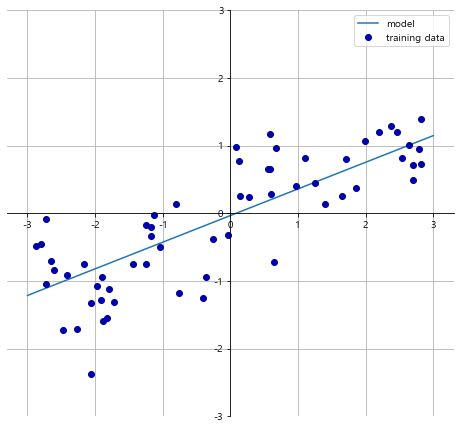

In [30]:
# In[26]:
mglearn.plots.plot_linear_regression_wave()

+ 선형 회귀(최소제곱법)
  + 가장 간단하고 오래된 회귀용 선형 알고리즘
  + 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾는 것이 목
적
  + 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법이 없음

In [31]:
# In[27] & In[28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973


+ 기울기 파라미터(w)는 가중치 또는 계수 라고 불리며 coef 속성에 저장
파라미터(b)는 intercept 속성에 저장

In [32]:
# In[29]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [33]:
# In[30]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [34]:
# In[31]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


+ 리지회귀
  + 훈련 데이터를 잘 예측하고 추가 제약 조건을 만족시키기 위해 가중치(w) 선택
  + 모든 특성이 출력에 주는 영향을 최소한으로 만든다(기울기를 작게)
  + 규제(regularization)-과대적합이 되지 않도록 모델을 강제로 제한
  + L2 규제 사용

In [35]:
# In[32]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [36]:
# In[33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [37]:
# In[34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


+ 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마 단순화할지를 지정

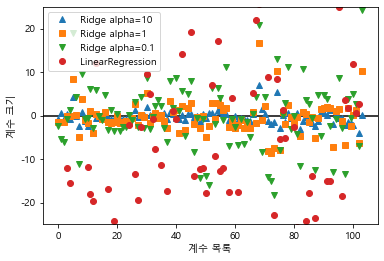

In [38]:
# In[35]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")
plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

+ 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절대값의 크기가 작을 것이라고
예상

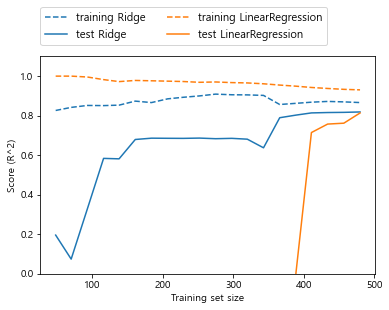

In [39]:
# In[36]:
mglearn.plots.plot_ridge_n_samples()

+ 규제의 효과를 이해하기 위해 alpha 값을 고정하고 훈련 데이터의 크기를 변화
+ 보스턴 주택가격 데이터셋에서 여러가지 크기로 샘플링하여 LinearRegression 과 ridge(alpha=1)을 적용  
  
+ 결론
  + 1.데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아진다.
  + 2.데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 떄문에 선형 회귀의 훈련
데이터 성능이 감소

+ 라소(lasso)
  + 리지 회귀에서와 같이 계수를 0에 가깝게 만드려고 한다
  + 방식이 조금 다르며 L1규제라고 한다
  + 완전히 제외되는 특성이 생김
  + 계수를 조절하는 alpha 매개변수 사용

In [40]:
# In[37]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [42]:
# In[38]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [43]:
# In[39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

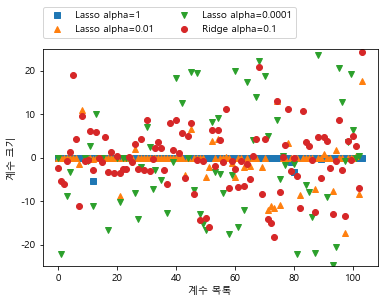

In [44]:
# In[40]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

+ 분류용 선형 모델
  + 이진 분류(binary classification)
  + 계산 값이 0보다 작으면 클래스 -1이라고 예측, 0보다 크면 +1 이라고 예측
  + 결정 경계 가 입력의 선형 함수
  + 선형 분류 알고리즘
     + 로지스틱 회귀(Logistic Regression)
     + 서포트 벡터 머신(LinearSVC)  
     *기본적으로 L2 규제 사용

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


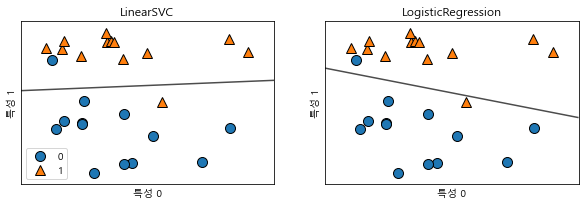

In [46]:
# In[41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

+ 규제의 강도를 결정하는 매개변수는 C
+ C값이 높아지면 규제 감소

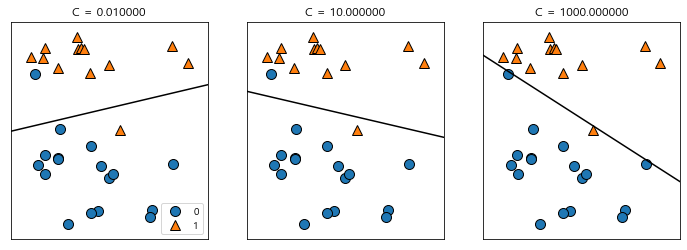

In [47]:
# In[42]:
mglearn.plots.plot_linear_svc_regularization()

+ 다중 클래스 분류용 선형 모델
  + 대부분의 선형 모델은 다중 클래스를 지원X(로지스틱 회귀 제외)
  + 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법 일대다 방법을 사용

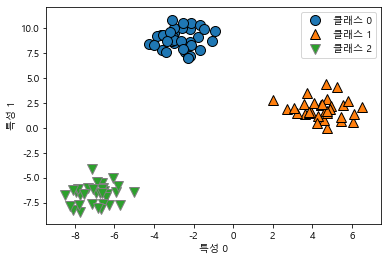

In [48]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


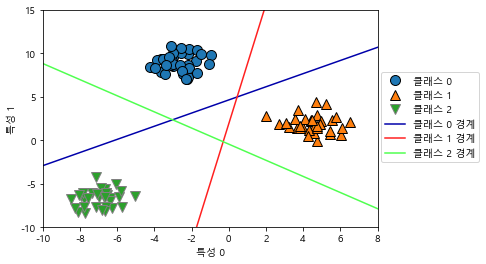

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
'클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

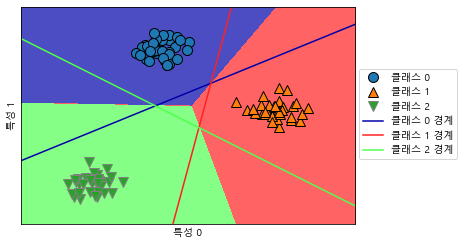

In [52]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
'클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

##### 장단점과 매개변수
+ 선형모델의 주요 매개변수
   + 회귀모델: alpha
   + LinearSCV/LogisticRegression: C
+ 규제
   + 중요한 특성이 많지 않다고 생각하면 L1 규제 사용
   + 그렇지 않으면 기본적으로 L2 규제 사용

### 2.3.4 나이브 베이즈 분류기
+ GaussianNB:연속적인 데이터
+ BernoulliNB:이진 데이터
+ MultinomialNB:카운트 데이터

+ BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈.

In [53]:
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
# 각 클래스에 대해 반복
# 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


+ 장단점과 매개변수
   + MultinomialNB/BernoulliNB 모델의 복잡도를 조절하는 alpha 매개변수 존재
   + alpha 개수만큼 모든 특성에 양의 값을 가진 데이터 포인트를 추가
   + alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다

### 2.3.5 결정 트리
+ 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습
+ 가능한 한 적은 예/아니오 질문으로 문제를 해결하는 것

+ 노드:질문이나 정답을 담은 네모 상자(마지막 노드:리프)
+ 에지:질문의 답과 다음 질문을 연결

+ 결정 트리의 복잡도 제어하기
일반적으로 트리 만들기를 모든 리프 노드가 순수 노두가 될 때까지 진행하면 모델이 매우 복잡해지고 훈
련 데이터에 과대적합 된다.
+ 해결
   + 사전 가지치기(트리 생성을 일찍 중단)
   + 사후 가지치기(데이터 포인트가 적은 노드를 삭제, 병합)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(tree.score(X_test,y_test)))
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("사전 가지치기 훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("사전 가지치기 테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.937
사전 가지치기 훈련 세트 정확도: 0.988
사전 가지치기 테스트 세트 정확도: 0.951


+ 트리의 특성 중요도
  + 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가
  + 0은 특성에 대해 전혀 사용되지 않음
  + 1은 완벽하게 타깃 클래스를 예측
  + 특성 중요도의 합은 1

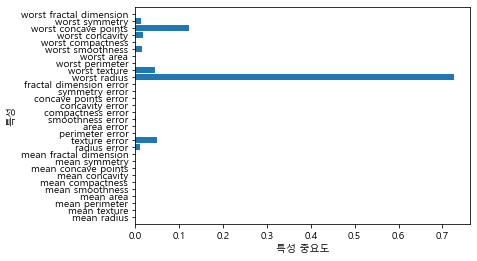

In [58]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
plot_feature_importances_cancer(tree)

+ 첫 번째 노드에서 사용한 특성('worst radius')이 가장 중요한 특성
+ 어떤 특성의 featureimportance 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님!!

+ 결정 트리(회귀-DecisionTreeRegressor)
   + 사용법과 분석은 분류 트리와 매우 비슷
   + 외삽(extrapolation),즉 훈련 데이터의 범위 밖의 포인트에 대해 예측을 할 수 없음.

Text(0, 0.5, '가격($/Mbyte)')

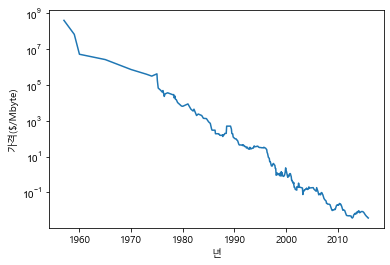

In [59]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격($/Mbyte)")

In [60]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]
X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


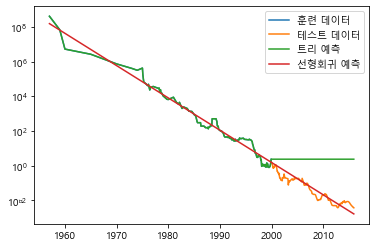

In [61]:
plt.semilogy(data_train.date,data_train.price,label="훈련 데이터")
plt.semilogy(data_test.date,data_test.price,label="테스트 데이터")
plt.semilogy(ram_prices.date,price_tree,label="트리 예측")
plt.semilogy(ram_prices.date,price_lr,label="선형회귀 예측")
plt.legend()

+ 실제 값과 결정 트리, 선형 회귀의 예측값을 비교
   + 선형모델: 직선으로 데이터를 근사,테스트 데이터를 꽤 정확히 예측
   + 트리모델: 훈련 데이터를 완벽히 예측하지만, 새로운 데이터를 예측할 능력이 없음, 모든 트리 기반
모델의 공통된 단점

### 2.3.6 결정 트리의 앙상블
+ 앙상블(ensemble):여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
   + 랜덤 포레스트
   + 그레이디언트 부스팅
+ 랜덤 포레스트
   + 훈련 데이터에 과대적합되는 경향을 해결 및 회피
   + 잘 작동하는 서로 다른 방향으로 과대적합된 트리를 많이 만들어 그 결과를 평균냄으로써 과대적합된 양
을 줄일 수 있다.

+ 랜덤 포레스트 분석

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

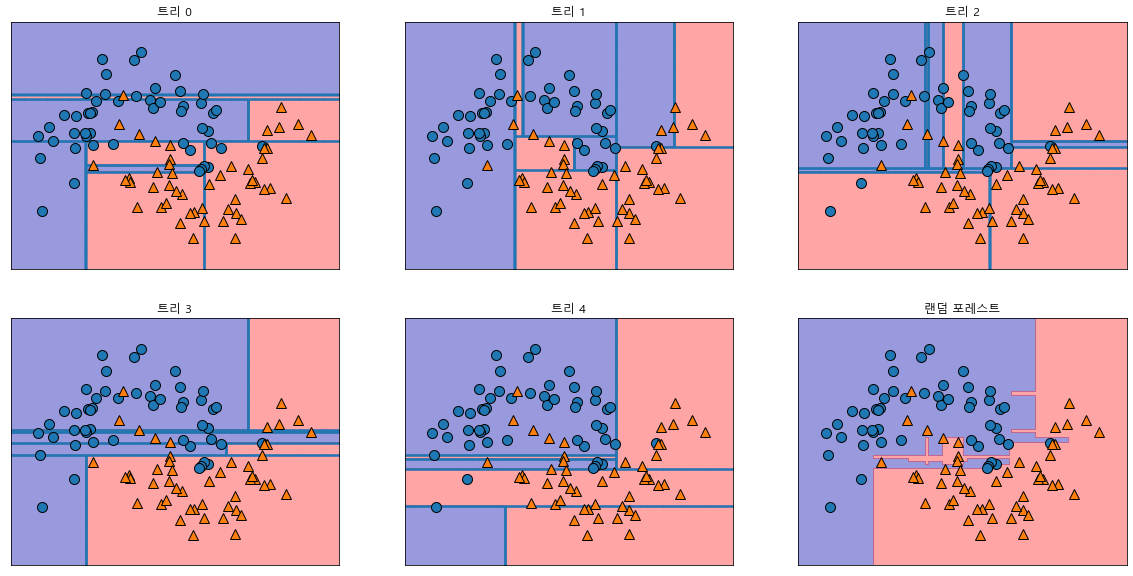

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


+ 랜덤 포레스트는 매개변수 튜닝 없이도 선형모델이나 단일 결정 트리보다 높은 정확도
+ 랜덤 포레스트에서의 특성 중요도가 하나의 트리에서의 특성 중요도보다 더 신뢰할 만함.

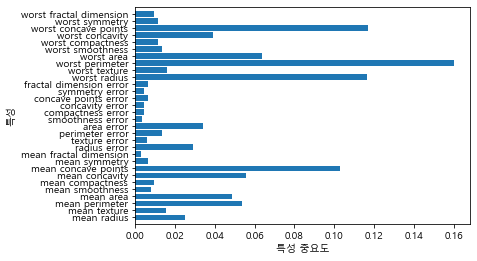

In [65]:
plot_feature_importances_cancer(forest)

+ 단일 트리의 결과와 마찬가지로 "worst radius" 특성을 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는
"worst perimeter"를 선택

+ 그레이디언트 부스팅 회귀 트리  
여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법
  + 회귀와 분류 모두 사용 가능
  + 강력한 사전 가지치기 사용
  + 메모리를 적게 사용며 예측이 빠름
  + 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 learning_rate 가 중요한 매개변수

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


+ 과대적합을 막기 위해 위 방법처럼 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수
있다

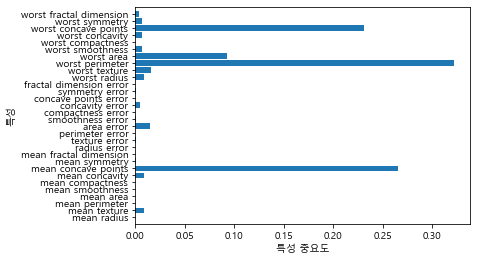

In [67]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

+ 랜덤 포레스트와 비슷한 특성을 강조
+ 다만 그레디언트 부스팅은 일부 특성을 완전히 무시